# Logistic regression

## Miguel Ángel Canela, IESE Business School

******

### Classification

When the target that we wish to predict is **categorical**, that is, its values stand for specific groups or classes, supervised learning is called  **classification**. These classes can be coded with numbers (such as 0/1) or with words. In Python terms, the target can be a numeric, a Boolean, or a string vector.

This note only covers **binary classification**, in which there are only two classes. **Multi-class** classification will appear later in this course. The two target values are typically called **positive** and **negative**. The labels positive/negative should be assigned so that they favor your intuition. If you leave this to the computer, it may call positive what you call negative.

In the business context, two classics are:

* **Churn modeling**. A telephone company classifies its customers as either churners or non-churners (see the example). The class has two values, "churn" and "no churn".

* **Credit scoring**. A bank classifies credit applications as either "good" or "bad".

Let me assume, to simplify, that the target values are 1/0. Although it is not equally evident in the various methods and implementations, a binary classifier produces a **predictive score** for every instance. The score is a number in the 0-1 range, which is later transformed into a **predicted class**, based on a **cutoff** value. The instances whose scores exceed the cutoff are classified as positive and the rest as negative.

The simplest approach is to set 0.5 as the cutoff. Nevertheless, it can be replaced by another value with a better performance. In a business application, the choice of the cutoff may be based on a **cost/benefit analysis**. Specialized software can find the **optimal cutoff** for a user-specified cost matrix. In ML libraries where binary classification are just a particular case, like scikit-learn, the cutoff is applied automatically, so if you want to change that, you have to write a few extra lines of code.

Classification models, or **classifiers**, can work in various ways. They differ in the way in which they calculate the scores. In **logistic regression**, the score is calculated by means of a (nonlinear) equation. This method is discussed in this note. Other methods, which will come later in this course, are based on **decision trees**. 

### How to evaluate a classifier

The evaluation of a classifier is usually based on a **confusion matrix**, obtained by crosstabulation of the actual class and the predicted class. There is not a universal consensus on what to put in the rows and the columns. I use the same convention as the scikit-learn manual, which places the actual class in the rows and the predicted class in the columns. The same rule is followed by Géron (2017) and VanderPlas (2017). 

*Note*. Curiously, the scikit-learn manual refers to Wikipedia when referencing the confusion matrix and the metrics related, and Wikipedia does not follow the same convention. The conclusion is that this is something that you should always check when using a new source.

Table 1 is an example of a confusion matrix of a churn model. The four cells of the table are referred to as **true positive** (tp = 114), **false positive** (fp = 91), **false negative** (fn = 369) and **true negative** (tn = 2,759), respectively. 

The proportion of instances classified in the right way is called the **accuracy**:

$$\hbox{Accuracy}={\hbox{tp}+\hbox{tn}\over\hbox{tp}+\hbox{fp}+\hbox{fn}+\hbox{tn}}={114+2,759\over114+91+369+2,759}= 86.2\%.$$

******

### Table 1

| <i></i> | Predicted positive | Predicted negative |
|------:|:------:|:------:|
| Actual positive | 114 | 369 |
| Actual negative | 91 | 2,759 |

******

Although it looks as the obvious metric for the evaluation of a classifier, the accuracy is not always adequate, specially with **imbalanced data sets**. For example, if you have 90% of negative instances, classifying all the instances as negative gives you 90% accuracy. In a business context, a visual inspection of the confusion matrix is always recommended. It will probaly help you to decide whether the classifier is going to be useful.

In many cases, it is practical to examine the performance of the classifier separately on the actual positives and the actual negatives. Then, the usual metrics are:

* The **true positive rate**, or proportion of right classification among the actual positives,

$$\hbox{TP rate} = {\hbox{tp}\over\hbox{tp}+\hbox{fn}}={114\over114+369}=23.6\%.$$

* The **false positive rate**, or proportion of wrong classification among the actual negatives,

$$\hbox{FP rate} = {\hbox{fp}\over\hbox{fp}+\hbox{tn}}={91\over91+2,759}=3.2\%.$$

In a good model, the TP rate should be high and the FP rate low. Nevertheless, the relative importance given to these statistics depends on the actual application. The advantage of this approach is that it works when the proportion of positive instances in the training data is inflated, which is a strategy used for training classifiers which are intended to detect rare events, such as fraud. If this were the case, the training instances could not be taken as a *representative sample* of the actual population, and the accuracy extracted from the confusion matrix would not be extrapolable to the real world. On the contrary, the TP and FP rate would still be valid, since they are calculated separately on the actual positives and the actual negatives. 

An alternative approach, used by scikit-learn, is based on the precision and the recall. These statistics come in the module `sklearn.metrics`: 

* The **precision** is the proportion of right classification among the predicted positives,

$$\hbox{Precision} = {\hbox{tp}\over\hbox{tp}+\hbox{fp}}={114\over114+91}=55.6\%.$$

* The **recall** is the same as true positive rate, 

$$\hbox{Recall} = {\hbox{tp}\over\hbox{tp}+\hbox{fn}}={114\over114+369}=23.6\%.$$

In a good model, precision and recall should be high. Some authors combine precision and recall in a single metric (in mathematical terms, it is the harmonic mean), called the **F1-score**,

$$\hbox{F1} = {2\cdot\hbox{Precision}\cdot\hbox{Recall}\over\hbox{Precision}+\hbox{Recall}} =
{2\cdot\hbox{tp}\over2\cdot\hbox{tp}+\hbox{fp}+\hbox{fn}} = {2\cdot114\over2\cdot114+91+369}=33.1\%.$$

This statistic is also available by `sklearn.metrics`. 

### Logistic regression

Let me suppose that the target is coded with a dummy (positive = 1, negative = 0) and that there is a collection of numeric features $X_1,\dots,X_k$ available for prediction (some of them may be dummies created by coding categorical features). A **logistic regression equation** is one of type

$$p=F\big(a+b_1\,X_1+\cdots+b_k\,X_k\big).$$

Here, $p$ is the predictive score, and $F$ is the **logistic function**,

$$F(x)={1\over 1+\exp(-x)}\,.$$

The graph of the logistic function has an inverted S shape, as shown in Figure 1. 

In [1]:
import matplotlib.pyplot as plt

In [2]:
import math
import numpy as np
x = np.linspace(-5, 5, 1000)
def f(x):
    return 1/(1+math.exp(-x))
f = np.vectorize(f)

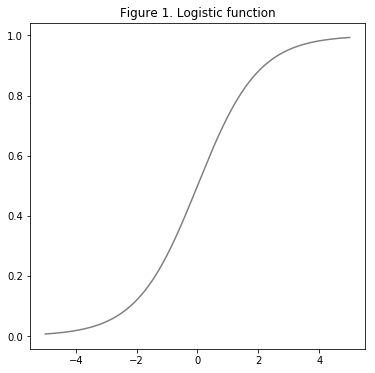

In [3]:
plt.figure(figsize=(6,6))
plt.title('Figure 1. Logistic function')
plt.plot(x, f(x), color='0.5')
plt.show()

As given by the logistic function, the scores fall within the unit interval ($0<p<1$). So, the score can be regarded as the probability, or propensity, of an instance to have positive class. In logistic regression, this is obvious to the user.

The coefficients of the logistic regression equation are obtained so that a statistical magnitude, the **likelihood**, achieves its maximum value. This is called **maximum likelihood estimation** in the statistics textbook. If you are using Python, but you want logistic regression with a statistical flavor, you can use the library StatsModels.

*Note*. In spite of its name, logistic regression is a classification method, not a regression method. This comes from the fact that logistic regression was created by statisticians, and regression does not mean the same in statistics and machine learning.

### References

1. A Géron (2017), *Hands-On Machine Learning with Scikit-Learn and TensorFlow --- Concepts, Tools, and Techniques to Build Intelligent Systems*, O'Reilly.

2. F Provost & T Fawcett (2013), *Data Science for Business --- What You Need to Know About Data Mining and Data-Analytic Thinking*, O'Reilly.

3. J VanderPlas (2017), *Python Data Science Handbook*, O'Reilly.